<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
# import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Task 1: Visualizations
* For the "Median value of owner-occupied homes" provide a boxplot.
* 
Provide a  bar plot for the Charles rivevariable.
* 

Provide a boxplot for the MEDV variable vs the AGE variabe. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and o.
* r)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relatio
* hip?

Create a histogram for the pupil to teacher ratio variable

[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

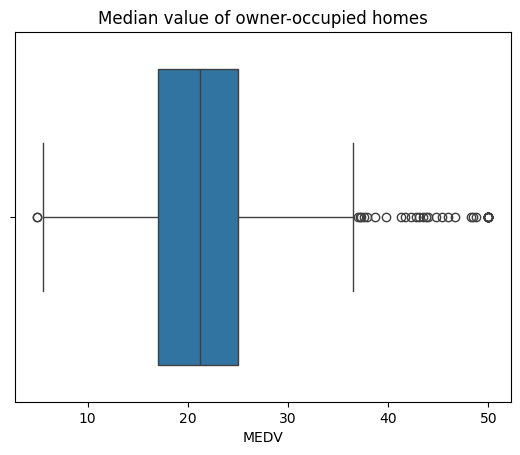

In [31]:
#1. For the "Median value of owner-occupied homes" provide a boxplot.
sns.boxplot(x = boston_df['MEDV']).set(title = "Median value of owner-occupied homes")


[Text(0.5, 1.0, ' Charles river variable')]

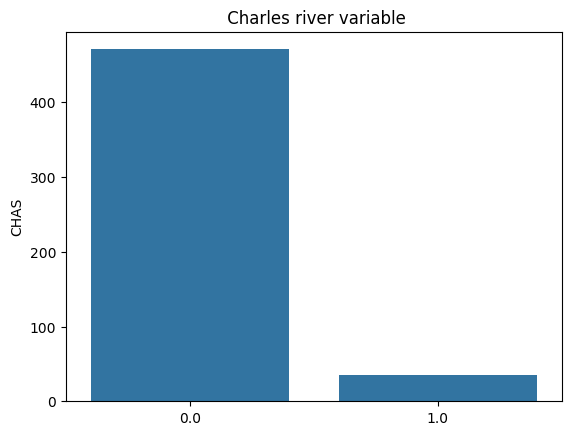

In [29]:
#2. Provide a  bar plot for the Charles river variable..
aa=boston_df['CHAS'].value_counts()
sns.barplot(aa).set(title = " Charles river variable")

[Text(0.5, 1.0, 'Boxplot showing MEDV variable vs the AGE variable')]

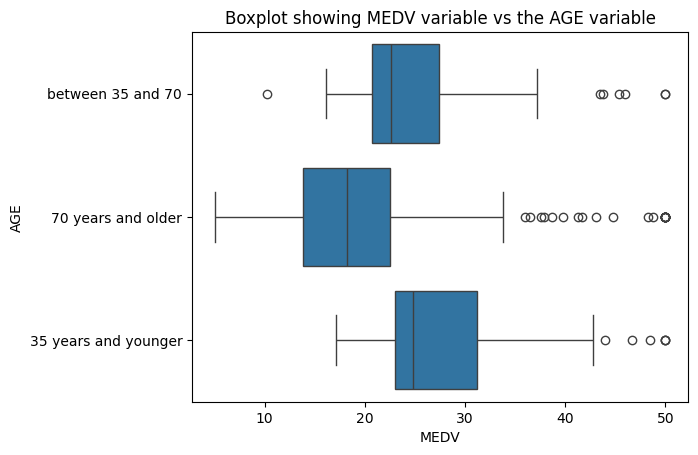

In [37]:
#3.Provide a boxplot for the MEDV variable vs the AGE variable. Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.
def age_bracket(age):
    if age <= 35:
        return '35 years and younger'
    elif age > 35 and age < 70:
        return 'between 35 and 70'
    else:
        return '70 years and older'
        
sns.boxplot( x = boston_df["MEDV"], y = boston_df["AGE"].map(age_bracket)).set(title = "Boxplot showing MEDV variable vs the AGE variable" )

[Text(0.5, 1.0, 'Nitric oxide concentration vs non-retail business acres per town')]

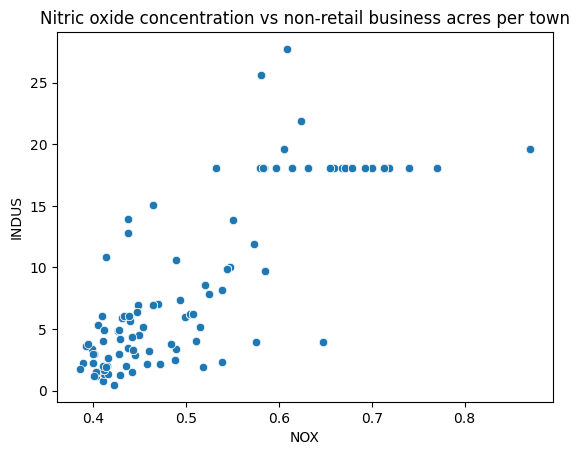

In [39]:
#4 - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(boston_df, x = "NOX", y = "INDUS").set(title =  'Nitric oxide concentration vs non-retail business acres per town')

Overall, it seems the higher levels of non-retail business acres per town are associated with higher NOX cencentration and vice cersa. The correlation appears to be positive.

[Text(0.5, 1.0, 'pupil to teacher ratio')]

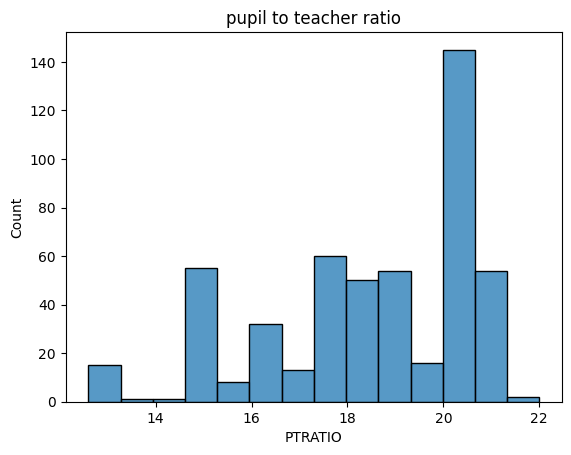

In [41]:
#5 - Create a histogram for the pupil to teacher ratio variable
sns.histplot(boston_df['PTRATIO']).set(title = "pupil to teacher ratio")

#### Task 3: Use the appropriate tests to answer the questions provided.

## 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
 Null hypothesis =  There is no difference in teh median value of houses bounded and notbounded by the Charles river. 
 
 Alternate hypothesis = Their is a difference between the two.
 
 This should be a two-tailed test. For an alpha value of 0.05, we should reject the null hypothesis is p-value is less than 0.025. 


In [48]:
# test statistic
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the p value is less than 0.025 we reject the null hypothesis, meaning that their is difference between the median values for houses bounded by the Charles river compared to those that are not. 

# 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
Null hypothesis = There is no difference in eeh median value of housesfor each proportion of owner occupied units built prior to 1940 (AGE)

Alternate hypothesis = Their is a ffdiren,

aplha = 0.05

ce.0.025

In [52]:
#test statistic
less_than_35 = boston_df[boston_df['AGE'] <= 35]['MEDV']
between_35_and_70 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV']
greater_than_70 = boston_df[boston_df['AGE'] >= 70]['MEDV']
scipy.stats.f_oneway(less_than_35, between_35_and_70,greater_than_70)  # (boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Since p-value is less than 0.025, atleast one of the mean is different from the others and hence we reject the null hypothesis.

# 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Null Hypothesis =  Their is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alternate hypothesis = Their is an association  between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [53]:
#test statistic
scipy.stats.pearsonr(boston_df['NOX'], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p value is very small compared to 0.025, we reject the null hypothesis indicating that their is an association betwee the nitric oxide concentration and proportion of non-retail business acres per town. Infact, the correlation coefficient between the two is 0.76.

# 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

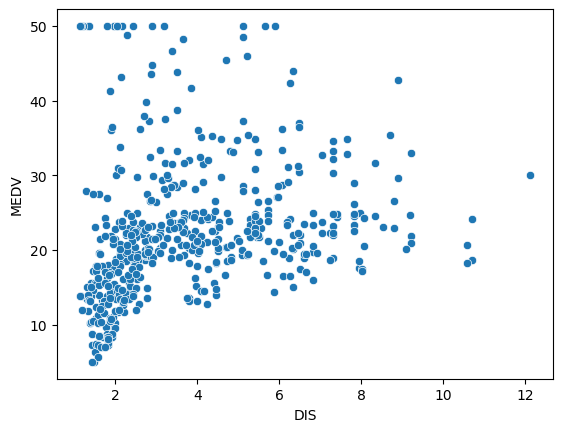

In [59]:
sns.scatterplot(x = boston_df['DIS'], y = boston_df['MEDV'])

In [56]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        18:46:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The median value of houses increases by 1.0916 for an additional weighted distance to the five Boston employment centres.